In [3]:
import  tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [4]:
num_words = 30000
maxlen = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')

(25000,)   (25000,)
(25000,)   (25000,)
(25000, 200)   (25000,)
(25000, 200)   (25000,)


In [5]:
def lstm_model():
    model = tf.keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen), # input_dim是词典大小， output_dim是词嵌入维度
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
lstm_model = lstm_model()
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           960000    
_________________________________________________________________
lstm (LSTM)                  (None, 200, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 136       
Total params: 968,456
Trainable params: 968,456
Non-trainable params: 0
_________________________________________________________________


In [6]:
def gru_model():
    model = tf.keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.GRU(32, return_sequences=True),
        layers.GRU(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
gru_model = gru_model()
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
gru (GRU)                    (None, 200, 32)           6336      
_________________________________________________________________
gru_1 (GRU)                  (None, 1)                 105       
Total params: 966,441
Trainable params: 966,441
Non-trainable params: 0
_________________________________________________________________


In [7]:
%%time
historyLstm = lstm_model.fit(x_train, y_train, batch_size=64, epochs=10,validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 124s 352ms/step - loss: 0.5806 - accuracy: 0.6767 - val_loss: 0.4089 - val_accuracy: 0.8328
Epoch 2/10
352/352 [==============================] - 124s 351ms/step - loss: 0.3769 - accuracy: 0.8632 - val_loss: 0.4007 - val_accuracy: 0.8468
Epoch 3/10
352/352 [==============================] - 124s 352ms/step - loss: 0.3378 - accuracy: 0.8839 - val_loss: 0.4104 - val_accuracy: 0.8372
Epoch 4/10
352/352 [==============================] - 124s 352ms/step - loss: 0.3343 - accuracy: 0.8900 - val_loss: 0.4519 - val_accuracy: 0.8184
Epoch 5/10
352/352 [==============================] - 124s 351ms/step - loss: 0.3617 - accuracy: 0.8641 - val_loss: 0.3965 - val_accuracy: 0.8552
Epoch 6/10
352/352 [==============================] - 123s 351ms/step - loss: 0.2514 - accuracy: 0.9238 - val_loss: 0.3921 - val_accuracy: 0.8604
Epoch 7/10
352/352 [==============================] - 123s 350ms/step - loss: 0.2852 - accuracy: 0.9004 - val_loss: 0.4141 -

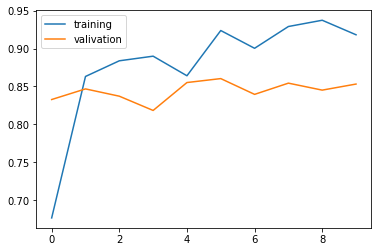

In [8]:
plt.plot(historyLstm.history['accuracy'])
plt.plot(historyLstm.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [7]:
%%time
historyGru = gru_model.fit(x_train, y_train, batch_size=64, epochs=10,validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 155s 441ms/step - loss: 0.5783 - accuracy: 0.6650 - val_loss: 0.4026 - val_accuracy: 0.8336
Epoch 2/10
352/352 [==============================] - 154s 438ms/step - loss: 0.3063 - accuracy: 0.8864 - val_loss: 0.3445 - val_accuracy: 0.8636
Epoch 3/10
352/352 [==============================] - 157s 445ms/step - loss: 0.1983 - accuracy: 0.9339 - val_loss: 0.3447 - val_accuracy: 0.8684
Epoch 4/10
352/352 [==============================] - 157s 445ms/step - loss: 0.1351 - accuracy: 0.9579 - val_loss: 0.3236 - val_accuracy: 0.8796
Epoch 5/10
352/352 [==============================] - 156s 444ms/step - loss: 0.0932 - accuracy: 0.9727 - val_loss: 0.3453 - val_accuracy: 0.8844
Epoch 6/10
352/352 [==============================] - 156s 442ms/step - loss: 0.0658 - accuracy: 0.9828 - val_loss: 0.4143 - val_accuracy: 0.8808
Epoch 7/10
352/352 [==============================] - 155s 440ms/step - loss: 0.0578 - accuracy: 0.9838 - val_loss: 0.4666 -

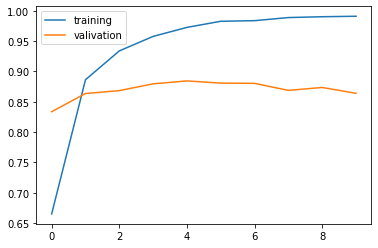

In [8]:
plt.plot(historyGru.history['accuracy'])
plt.plot(historyGru.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()